# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

Iris dataset is very popular machine learing dataset.Here we have data of three types of Iris plant Namely Iris Setosa,Iris versicolor and Iris Virginica.In this Note book we will be building machine learning algorithms to classify Iris plant based on the flower features.In this notebook we will be covering following topics

1.Importing Data

2.Data Preparation 

3.Model Build

4.Analysis and Model Performance Comparision 

5.Conclusion


If you like the notebook please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## 1.Importing Data

In [2]:
df = pd.read_csv("../input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2.Data Preparation 

### Matrix of Features 

In [3]:
X=df.iloc[:,[1,2,3,4]].values
y=df.iloc[:,5].values

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

### Examining Dimension of Data

In [5]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [6]:
X_test.shape,y_test.shape

((30, 4), (30,))

We can see that there are 150 rows of data.After train test split we have 120 rows of data in training set and 30 rows of data in the test set.

## 3.Model Build 

### Importing Modules

In [7]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.gaussian_process.kernels import RBF 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### Defining Learning Classifiers

In [8]:
names = ['Nearest_Neighbors','Linear_SVM','Polynomial_SVM','RBF_SVM','Gaussian_Process','Gradient_Boosting','Decision_Tree','Extra_Trees','Random_Forest','Neural_Net','AdaBoost','Naive_Bayes','QDA','SGD']

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.025),
    SVC(kernel='poly',degree=3,C=0.025),
    SVC(kernel='rbf',C=1,gamma=2),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10,min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss='hinge',penalty='l2')
]

### Model Build and Accuracy Score

In [9]:
# Iterating over classifiers
scores =[]
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)

In [10]:
scores

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 0.7666666666666667]

## 4.Analysis of Model Performance

### Import Library 

In [11]:
import seaborn as sns

### Creating data frame for model performance

In [12]:
df1 = pd.DataFrame()
df1['name'] = names
df1['score'] = scores
df1

,name,score
0,Nearest_Neighbors,0.966667
1,Linear_SVM,0.966667
2,Polynomial_SVM,0.966667
3,RBF_SVM,0.966667
4,Gaussian_Process,1.000000
5,Gradient_Boosting,0.966667
6,Decision_Tree,0.966667
7,Extra_Trees,1.000000
8,Random_Forest,1.000000
9,Neural_Net,0.966667


### Adding color to the data frame

In [13]:
cm = sns.light_palette('green',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.966667
1,Linear_SVM,0.966667
2,Polynomial_SVM,0.966667
3,RBF_SVM,0.966667
4,Gaussian_Process,1.000000
5,Gradient_Boosting,0.966667
6,Decision_Tree,0.966667
7,Extra_Trees,1.000000
8,Random_Forest,1.000000
9,Neural_Net,0.966667


Darker shade of green mean more accurate is the model

### Bar Plot of model Performance

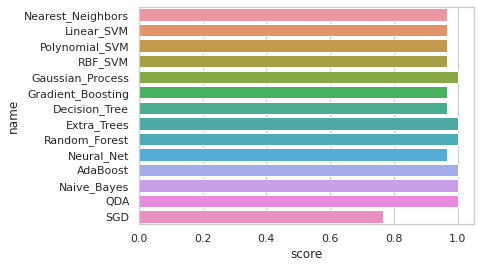

In [14]:
sns.set(style='whitegrid')
ax = sns.barplot(y='name',x='score',data=df1)

## 5.Conclusion

So here we have written a code to compare the accuracy of different machine learning model.

We have got model performance comparision in dataframe and also in the form of bar plots.

We can see that Gaussan_process,Gradient_boosting,Adaboost,Naive_Bayes ad QDA have 100 % Accuracy.